In [26]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='AppleGothic')

In [5]:
seoul_class1 = pd.read_csv('../data/SEOUL_CLASS_1.csv')

In [6]:
seoul_class1

,상권_코드_명,기준_년_코드,기준_분기_코드,업종_대분류,경영_위기_비율,상권_코드,집객시설_수,교통_인프라,총 상주인구 수,총_직장_인구_수,...,연령대_1020_매출_비율,연령대_3040_매출_비율,연령대_5060_매출_비율,주중_매출_비율,주말_매출_비율,남성_매출_비율,여성_매출_비율,유사_업종_점포_수,개업률,폐업률
0,DMC(디지털미디어시티),2022,1,외식업,0.150943,2120098,72,24,1285,8846.0,...,20.60,62.10,17.60,87.80,12.40,57.50,42.50,421,4.08,2.04
1,DMC(디지털미디어시티),2022,2,외식업,0.207547,2120098,72,24,1285,8846.0,...,21.00,60.80,18.70,86.40,13.60,56.40,43.80,424,6.08,4.39
2,DMC(디지털미디어시티),2022,3,외식업,0.142857,2120098,72,24,1285,8846.0,...,21.00,61.00,18.00,85.80,14.40,56.40,43.70,426,5.00,4.67
3,DMC(디지털미디어시티),2022,4,외식업,0.291667,2120098,72,24,1285,8846.0,...,20.70,60.40,18.80,83.00,17.00,56.80,43.20,427,6.98,6.64
4,가락시장역,2022,1,외식업,0.235294,2120234,62,3,2694,10268.0,...,15.27,49.73,35.09,77.82,22.27,61.82,38.18,294,2.74,4.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,홍대입구역(홍대),2022,4,유통업,0.387755,2120103,91,22,4789,9580.0,...,38.74,30.11,31.68,71.47,28.63,43.63,56.37,874,3.14,1.93
664,화곡역,2022,1,서비스업,0.166667,2120120,88,16,2748,927.0,...,21.94,48.25,30.00,81.12,18.94,49.19,50.94,254,1.22,3.27
665,화곡역,2022,2,서비스업,0.473684,2120120,88,16,2748,927.0,...,19.60,46.00,34.33,81.27,18.93,54.93,45.13,258,3.23,1.61
666,화곡역,2022,3,서비스업,0.380952,2120120,88,16,2748,927.0,...,18.20,43.60,38.27,81.40,18.67,52.40,47.87,256,1.21,2.02


### 1) 전체 업종별 데이터 (군집 구분 X)

In [9]:
food_unique = seoul_class1[seoul_class1['업종_대분류'] == '외식업']['상권_코드_명'].unique()
service_unique = seoul_class1[seoul_class1['업종_대분류'] == '서비스업']['상권_코드_명'].unique()
supply_unique = seoul_class1[seoul_class1['업종_대분류'] == '유통업']['상권_코드_명'].unique()

In [12]:
# 문제: 업종별로 존재하는 상권 수가 모두 다름. 특히 유통업의 경우 데이터 수가 현저히 낮음
print('전체 상권 수: 113')
print('외식업 상권 수: ' + str(len(food_unique)))
print('서비스업 상권 수: ' + str(len(service_unique))) # 113개 상권 중 44개 상권의 데이터만 존재
print('유통업 상권 수: ' + str(len(supply_unique))) # 총 113개 상권 중 29개 상권의 데이터만 존재

전체 상권 수: 113
외식업 상권 수: 94
서비스업 상권 수: 44
유통업 상권 수: 29


In [48]:
class1_isrisky = pd.read_excel('../data/CREDIT_CLASS_1.xlsx')
class1_isrisky[class1_isrisky['year']== 2022].shape

In [49]:
class1_isrisky.columns

Index(['상권_코드_명', '기준_년_코드', '기준_분기_코드', '업종_대분류', '경영_위기_비율', '상권_코드',
       '집객시설_수', '교통_인프라', '총 상주인구 수', '총_직장_인구_수', '총_생활인구_수', '월_평균_소득_금액',
       '클러스터', '연령대_1020_매출_비율', '연령대_3040_매출_비율', '연령대_5060_매출_비율',
       '주중_매출_비율', '주말_매출_비율', '남성_매출_비율', '여성_매출_비율', '유사_업종_점포_수', '개업률',
       '폐업률'],
      dtype='object')

In [21]:
# 원인: 디자일로 상의 isrisky 값이 없는 것으로 보임
supply_unique_isrisky = class1_isrisky[class1_isrisky['class_1_name'] == '유통업']['trdar_nm'].unique()
print('유통업 상권 수: ' + str(len(supply_unique_isrisky)))

유통업 상권 수: 29


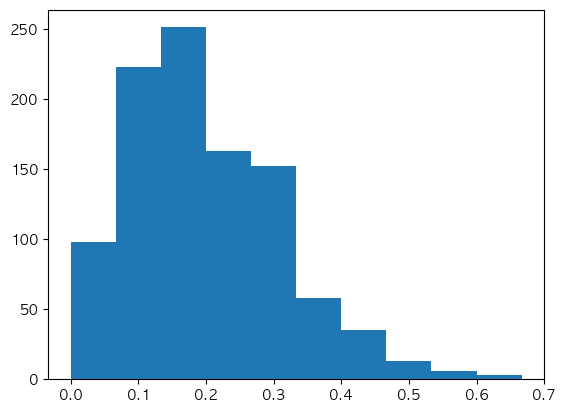

In [42]:
plt.hist(class1_isrisky['average(is_risky)'])
plt.show()

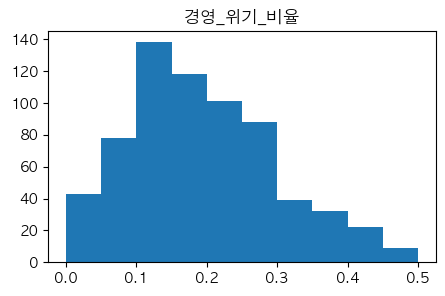

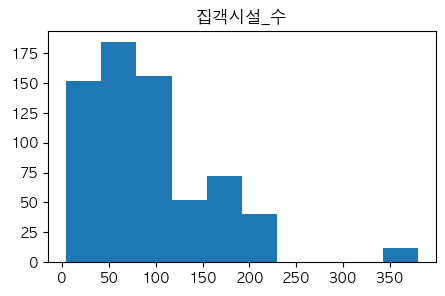

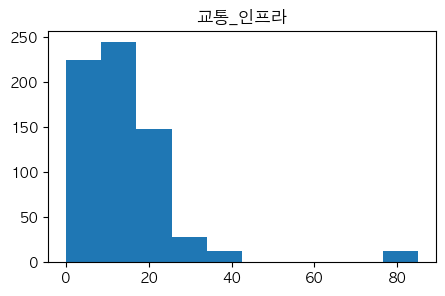

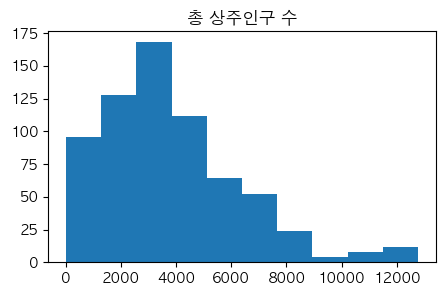

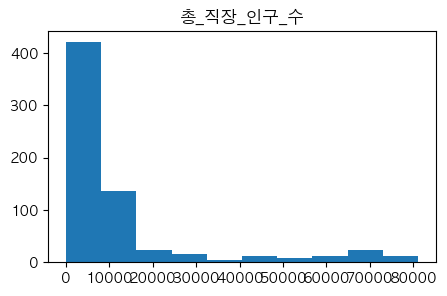

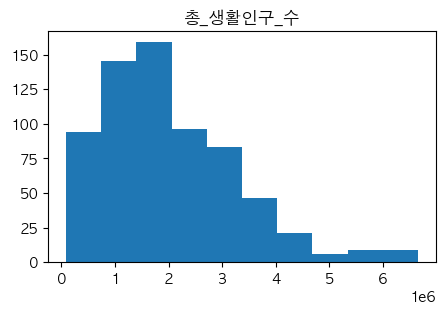

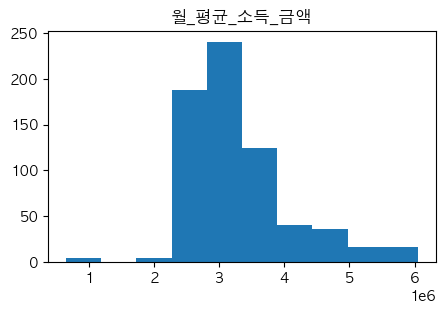

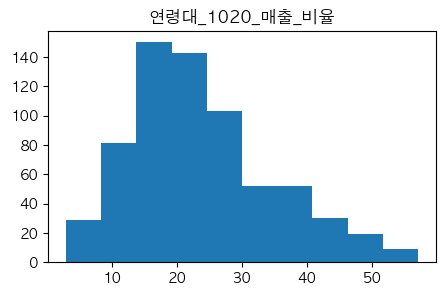

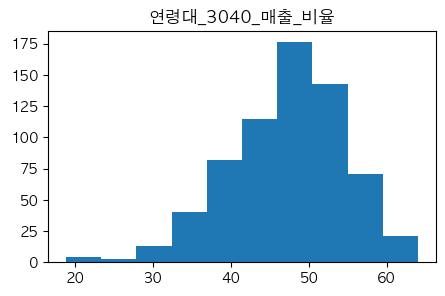

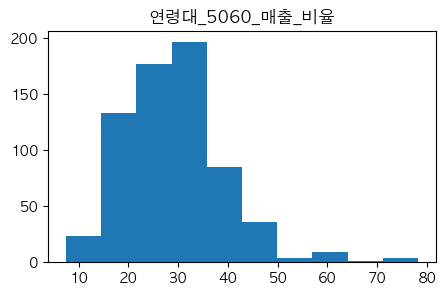

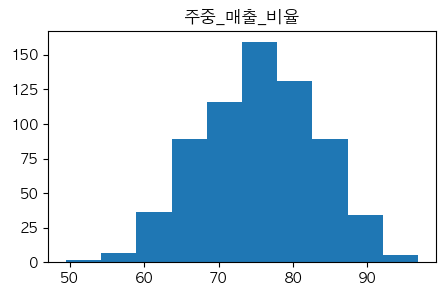

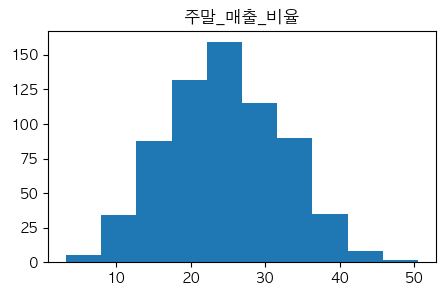

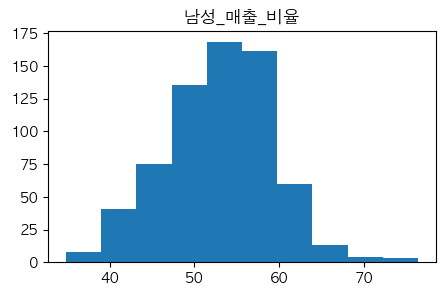

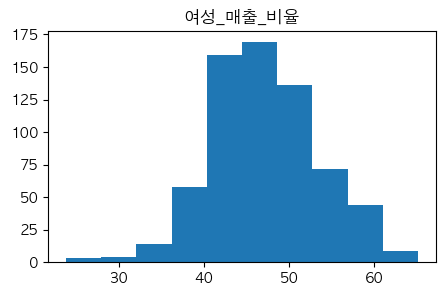

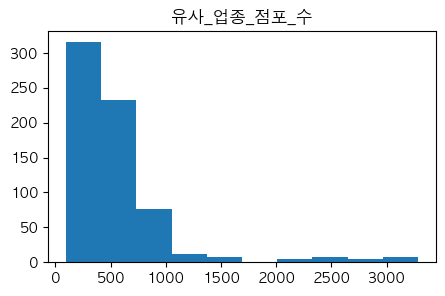

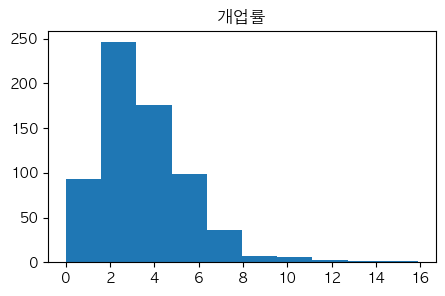

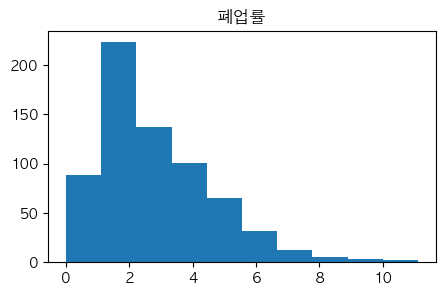

In [40]:
for col in seoul_class1.drop(['상권_코드_명', '클러스터', '기준_년_코드', '기준_분기_코드', '업종_대분류', '상권_코드'], axis=1).columns:
    plt.figure(figsize=(5, 3))
    plt.hist(seoul_class1[col])
    plt.title(col)
    plt.show()

### 2) 군집별 업종별 데이터

In [7]:
seoul_class1_0 = seoul_class1[seoul_class1['클러스터'] == 0]
seoul_class1_1 = seoul_class1[seoul_class1['클러스터'] == 1]
seoul_class1_2 = seoul_class1[seoul_class1['클러스터'] == 2]
seoul_class1_3 = seoul_class1[seoul_class1['클러스터'] == 3]

##### (1) 클러스터 0

In [23]:
seoul_class1_0.columns

Index(['상권_코드_명', '기준_년_코드', '기준_분기_코드', '업종_대분류', '경영_위기_비율', '상권_코드',
       '집객시설_수', '교통_인프라', '총 상주인구 수', '총_직장_인구_수', '총_생활인구_수', '월_평균_소득_금액',
       '클러스터', '연령대_1020_매출_비율', '연령대_3040_매출_비율', '연령대_5060_매출_비율',
       '주중_매출_비율', '주말_매출_비율', '남성_매출_비율', '여성_매출_비율', '유사_업종_점포_수', '개업률',
       '폐업률'],
      dtype='object')

In [32]:
cluster0_food_unique = seoul_class1_0[seoul_class1_0['업종_대분류'] == '외식업']['상권_코드_명'].unique()
cluster0_service_unique = seoul_class1_0[seoul_class1_0['업종_대분류'] == '서비스업']['상권_코드_명'].unique()
cluster0_supply_unique = seoul_class1_0[seoul_class1_0['업종_대분류'] == '유통업']['상권_코드_명'].unique()

print('전체 상권 수: ' + str(len(seoul_class1_0['상권_코드_명'].unique())))
print('외식업 상권 수: ' + str(len(cluster0_food_unique)))
print('서비스업 상권 수: ' + str(len(cluster0_service_unique)))
print('유통업 상권 수: ' + str(len(cluster0_supply_unique)))

전체 상권 수: 31
외식업 상권 수: 29
서비스업 상권 수: 10
유통업 상권 수: 7


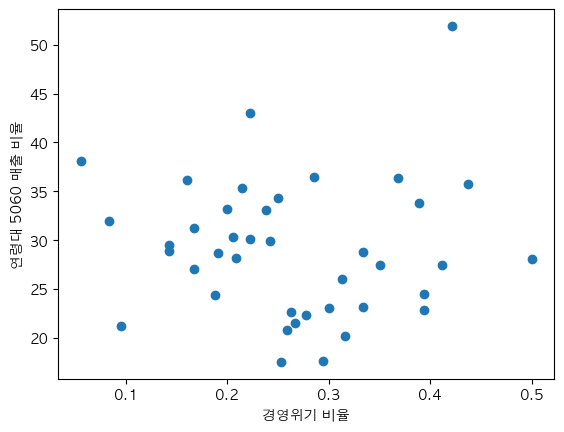

In [27]:
# 1.1) 연령대 5060 매출 비율과 경영 위기 비율의 산점도
x = seoul_class1_0[seoul_class1_0['업종_대분류'] == '서비스업']['경영_위기_비율']
y = seoul_class1_0[seoul_class1_0['업종_대분류'] == '서비스업']['연령대_5060_매출_비율']

plt.scatter(x,y)
plt.xlabel('경영위기 비율')
plt.ylabel('연령대 5060 매출 비율')

plt.show()

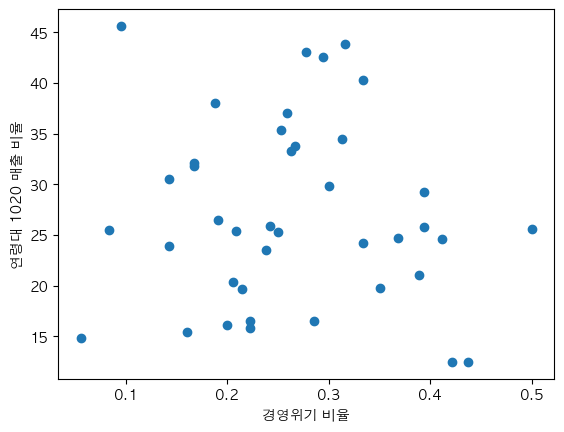

In [28]:
# 1.2) 연령대 1020 매출 비율과 경영 위기 비율의 산점도
x = seoul_class1_0[seoul_class1_0['업종_대분류'] == '서비스업']['경영_위기_비율']
y = seoul_class1_0[seoul_class1_0['업종_대분류'] == '서비스업']['연령대_1020_매출_비율']

plt.scatter(x,y)
plt.xlabel('경영위기 비율')
plt.ylabel('연령대 1020 매출 비율')

plt.show()

##### (2) 클러스터 1

In [33]:
cluster1_food_unique = seoul_class1_1[seoul_class1_1['업종_대분류'] == '외식업']['상권_코드_명'].unique()
cluster1_service_unique = seoul_class1_1[seoul_class1_1['업종_대분류'] == '서비스업']['상권_코드_명'].unique()
cluster1_supply_unique = seoul_class1_1[seoul_class1_1['업종_대분류'] == '유통업']['상권_코드_명'].unique()

print('전체 상권 수: ' + str(len(seoul_class1_1['상권_코드_명'].unique())))
print('외식업 상권 수: ' + str(len(cluster1_food_unique)))
print('서비스업 상권 수: ' + str(len(cluster1_service_unique)))
print('유통업 상권 수: ' + str(len(cluster1_supply_unique)))

전체 상권 수: 34
외식업 상권 수: 24
서비스업 상권 수: 6
유통업 상권 수: 8


##### (3) 클러스터 2

In [34]:
cluster2_food_unique = seoul_class1_2[seoul_class1_2['업종_대분류'] == '외식업']['상권_코드_명'].unique()
cluster2_service_unique = seoul_class1_2[seoul_class1_2['업종_대분류'] == '서비스업']['상권_코드_명'].unique()
cluster2_supply_unique = seoul_class1_2[seoul_class1_2['업종_대분류'] == '유통업']['상권_코드_명'].unique()

print('전체 상권 수: ' + str(len(seoul_class1_2['상권_코드_명'].unique())))
print('외식업 상권 수: ' + str(len(cluster2_food_unique)))
print('서비스업 상권 수: ' + str(len(cluster2_service_unique)))
print('유통업 상권 수: ' + str(len(cluster2_supply_unique)))

전체 상권 수: 17
외식업 상권 수: 16
서비스업 상권 수: 16
유통업 상권 수: 6


##### (4) 클러스터 3

In [35]:
cluster3_food_unique = seoul_class1_3[seoul_class1_3['업종_대분류'] == '외식업']['상권_코드_명'].unique()
cluster3_service_unique = seoul_class1_3[seoul_class1_3['업종_대분류'] == '서비스업']['상권_코드_명'].unique()
cluster3_supply_unique = seoul_class1_3[seoul_class1_3['업종_대분류'] == '유통업']['상권_코드_명'].unique()

print('전체 상권 수: ' + str(len(seoul_class1_3['상권_코드_명'].unique())))
print('외식업 상권 수: ' + str(len(cluster3_food_unique)))
print('서비스업 상권 수: ' + str(len(cluster3_service_unique)))
print('유통업 상권 수: ' + str(len(cluster3_supply_unique)))

전체 상권 수: 31
외식업 상권 수: 25
서비스업 상권 수: 12
유통업 상권 수: 8
